In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import glob
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor

In [2]:
from sktime.classification.compose import ComposableTimeSeriesForestClassifier

# Turn all .csv's (microlensing and variables) into 1 dataframe

This portion will take the time series data of each light curve and turn the entire collection into one dataframe of structure:

[X, y]

where X is an individual curve's magnitude data, and y is the classification: 0 for variable, 1 for microlensing

In [14]:
path_var = '/mnt/c/users/user/Desktop/moderate_noise_var_normed_trimmed/'
path_mulens = '/mnt/c/users/user/Desktop/moderate_noise_mulens_normed/'

In [15]:
# dataframe with each column magnitude point

df = []
y=0
for filepath in glob.glob(path_var + '*.csv'):
    ts = pd.read_csv(filepath, delimiter=',', header=None)
    #print(ts)
    ts_ = [ts, y]
    df.append(ts_)
    #print(ts)
y=1
gloob = glob.glob(path_mulens + '*.csv')
for i in np.arange(0, 1250, 2):
    filepath = gloob[i]
    ts = pd.read_csv(filepath, delimiter=',', header=None)
    ts_ = [ts, y]
    df.append(ts_)
    
df = pd.DataFrame(df, columns=('X', 'y'))
df = df.reset_index()

df

,index,X,y
0,0,0 0 0.00091 1 0.00091 2 0....,0
1,1,0 0 0.033476 1 0.041919 2...,0
2,2,0 0 0.121965 1 0.125594 2...,0
3,3,0 0 0.660468 1 0.661802 2...,0
4,4,0 0 0.751668 1 0.749780 2...,0
...,...,...,...
1059,1059,0 0 1.000000 1 0.999668 2 ...,1
1060,1060,0 0 1.000000 1 0.999598 2 ...,1
1061,1061,0 0 1.000000 1 0.999947 2 ...,1
1062,1062,0 0 1.000000 1 0.999933 2 ...,1


In [16]:
for i in range(len(df['X'])):
    if len(df['X'][i]) < 1000:
        df['X'][i].append(df['X'].iloc[-1])
    elif len(df['X'][i]) > 1000:
        df['X'][i] = df['X'][i][:-1]
    print('Length of %s: ' % (i) , len(df['X'][i]))
    #df['X'][i] = pd.Series(df['X'][i])

Length of 0:  1000
Length of 1:  1000
Length of 2:  1000
Length of 3:  1000
Length of 4:  1000
Length of 5:  1000
Length of 6:  1000
Length of 7:  1000
Length of 8:  1000
Length of 9:  1000
Length of 10:  1000
Length of 11:  1000
Length of 12:  1000
Length of 13:  1000
Length of 14:  1000
Length of 15:  1000
Length of 16:  1000
Length of 17:  1000
Length of 18:  1000
Length of 19:  1000
Length of 20:  1000
Length of 21:  1000
Length of 22:  1000
Length of 23:  1000
Length of 24:  1000
Length of 25:  1000
Length of 26:  1000
Length of 27:  1000
Length of 28:  1000
Length of 29:  1000
Length of 30:  1000
Length of 31:  1000
Length of 32:  1000
Length of 33:  1000
Length of 34:  1000
Length of 35:  1000
Length of 36:  1000
Length of 37:  1000
Length of 38:  1000
Length of 39:  1000
Length of 40:  1000
Length of 41:  1000
Length of 42:  1000
Length of 43:  1000
Length of 44:  1000
Length of 45:  1000
Length of 46:  1000
Length of 47:  1000
Length of 48:  1000
Length of 49:  1000
Length of 

<ipython-input-16-4c554d01c899>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X'][i] = df['X'][i][:-1]


In [17]:
df

,index,X,y
0,0,0 0 0.00091 1 0.00091 2 0....,0
1,1,0 0 0.033476 1 0.041919 2 ...,0
2,2,0 0 0.121965 1 0.125594 2 ...,0
3,3,0 0 0.660468 1 0.661802 2 ...,0
4,4,0 0 0.751668 1 0.749780 2 ...,0
...,...,...,...
1059,1059,0 0 1.000000 1 0.999668 2 ...,1
1060,1060,0 0 1.000000 1 0.999598 2 ...,1
1061,1061,0 0 1.000000 1 0.999947 2 ...,1
1062,1062,0 0 1.000000 1 0.999933 2 ...,1


In [13]:
x_test = []
for i in range(len(df['X'][0])):
    x_test.append(df['X'][0][0][i])
np.shape(x_test)

x_test

[0.0009103389761564608,
 0.05053807823153974,
 0.1001658174867764,
 0.1497935567421108,
 0.1994212959974452,
 0.24904903525268185,
 0.2986767745080651,
 0.34830451376339955,
 0.39793225301868507,
 0.4475599922739706,
 0.49718773152935386,
 0.5468154707846393,
 0.5964432100399738,
 0.5875010958058952,
 0.5823988629949143,
 0.5820973073886685,
 0.5881812467716623,
 0.5946823013907419,
 0.6053170890638715,
 0.6085197416695582,
 0.6155017444636016,
 0.6205192335458182,
 0.6196475837645412,
 0.6149173429056872,
 0.6258635912961051,
 0.6302185384991349,
 0.6385190216442552,
 0.6461976839226493,
 0.6524544124666737,
 0.6508822512133995,
 0.6501509238399844,
 0.6569535340653586,
 0.6598040049411501,
 0.6653970910381375,
 0.6694790974004923,
 0.6754298680669679,
 0.674644062582159,
 0.6771269437776152,
 0.6822952106628812,
 0.6912329226253636,
 0.6903216523994765,
 0.6950298819002029,
 0.6922696575925245,
 0.6898219945702289,
 0.6855793052936842,
 0.6839669733117036,
 0.684939325056428,
 0.6889

In [18]:
col_names = []
for i in range(len(df['X'][0])):
    col_names.append('X_' + str(i))

In [20]:
X = []

for i in range(len(df['X'])):
    X.append(np.asarray(df['X'][i]))

#print(np.shape(X))
X = np.reshape(X, (1064,1000))
data = pd.DataFrame(X)
#X.shape
#X
y = np.array(df['y'])

In [21]:
data['y'] = y

In [22]:
data

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,y
0,0.000910,0.000910,0.000910,0.000910,0.000910,0.000910,0.000910,0.000910,0.050538,0.100166,...,0.043203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.033476,0.041919,0.047716,0.055776,0.064553,0.071237,0.081602,0.089123,0.097129,0.105257,...,0.860889,0.867045,0.874203,0.878723,0.886906,0.894658,0.900136,0.904758,0.908869,0
2,0.121965,0.125594,0.129040,0.132316,0.134899,0.138499,0.141803,0.144239,0.146911,0.149753,...,0.369977,0.356754,0.343998,0.330850,0.317263,0.303963,0.289847,0.274665,0.259485,0
3,0.660468,0.661802,0.664045,0.669725,0.674174,0.678919,0.683942,0.687056,0.690636,0.695821,...,0.754373,0.751123,0.745844,0.738675,0.732995,0.725543,0.712681,0.697964,0.681935,0
4,0.751668,0.749780,0.749542,0.748981,0.747663,0.745034,0.743347,0.742540,0.739699,0.738039,...,0.270821,0.257836,0.244039,0.230971,0.217028,0.204485,0.192203,0.180235,0.169595,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1.000000,0.999668,0.999387,0.999105,0.998822,0.998538,0.998254,0.997968,0.997682,0.997396,...,0.006740,0.007272,0.007825,0.008397,0.008989,0.009601,0.010233,0.010884,0.011555,1
1060,1.000000,0.999598,0.999337,0.999075,0.998812,0.998548,0.998284,0.998019,0.997753,0.997486,...,0.009635,0.010240,0.010864,0.011505,0.012166,0.012841,0.013535,0.014247,0.014976,1
1061,1.000000,0.999947,0.999938,0.999929,0.999920,0.999911,0.999902,0.999893,0.999884,0.999875,...,0.227225,0.230712,0.234246,0.237827,0.241455,0.245128,0.248848,0.252612,0.256420,1
1062,1.000000,0.999933,0.999932,0.999931,0.999931,0.999930,0.999929,0.999929,0.999928,0.999928,...,0.262368,0.270669,0.278937,0.287177,0.295391,0.303586,0.311766,0.319901,0.328067,1


In [23]:
data = data.dropna(axis=0)
#X = data.iloc[::, 0:1000]
#X

In [24]:
X = data.iloc[::, 0:1000]
X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000910,0.000910,0.000910,0.000910,0.000910,0.000910,0.000910,0.000910,0.050538,0.100166,...,0.086406,0.043203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.033476,0.041919,0.047716,0.055776,0.064553,0.071237,0.081602,0.089123,0.097129,0.105257,...,0.853600,0.860889,0.867045,0.874203,0.878723,0.886906,0.894658,0.900136,0.904758,0.908869
2,0.121965,0.125594,0.129040,0.132316,0.134899,0.138499,0.141803,0.144239,0.146911,0.149753,...,0.383739,0.369977,0.356754,0.343998,0.330850,0.317263,0.303963,0.289847,0.274665,0.259485
3,0.660468,0.661802,0.664045,0.669725,0.674174,0.678919,0.683942,0.687056,0.690636,0.695821,...,0.757250,0.754373,0.751123,0.745844,0.738675,0.732995,0.725543,0.712681,0.697964,0.681935
4,0.751668,0.749780,0.749542,0.748981,0.747663,0.745034,0.743347,0.742540,0.739699,0.738039,...,0.284811,0.270821,0.257836,0.244039,0.230971,0.217028,0.204485,0.192203,0.180235,0.169595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,1.000000,0.999668,0.999387,0.999105,0.998822,0.998538,0.998254,0.997968,0.997682,0.997396,...,0.006227,0.006740,0.007272,0.007825,0.008397,0.008989,0.009601,0.010233,0.010884,0.011555
1060,1.000000,0.999598,0.999337,0.999075,0.998812,0.998548,0.998284,0.998019,0.997753,0.997486,...,0.009047,0.009635,0.010240,0.010864,0.011505,0.012166,0.012841,0.013535,0.014247,0.014976
1061,1.000000,0.999947,0.999938,0.999929,0.999920,0.999911,0.999902,0.999893,0.999884,0.999875,...,0.223785,0.227225,0.230712,0.234246,0.237827,0.241455,0.245128,0.248848,0.252612,0.256420
1062,1.000000,0.999933,0.999932,0.999931,0.999931,0.999930,0.999929,0.999929,0.999928,0.999928,...,0.254031,0.262368,0.270669,0.278937,0.287177,0.295391,0.303586,0.311766,0.319901,0.328067


In [25]:
y = data.iloc[::,1000]
y

0       0
1       0
2       0
3       0
4       0
       ..
1059    1
1060    1
1061    1
1062    1
1063    1
Name: y, Length: 1061, dtype: int64

# Hopefully machine learning stuff

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sktime.transformations.panel.summarize import RandomIntervalFeatureExtractor
from sktime.utils.slope_and_trend import _slope
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size=0.5)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sktime.datatypes._panel._convert import from_nested_to_2d_array

# Dummy Classifer (not for actual use)

In [29]:
from sklearn.dummy import DummyClassifier

classifier = DummyClassifier(strategy='prior')
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.5819209039548022

# Stuff for plots maybe

In [30]:
"""

arrays used to house averages for false positive (fp) and false negatives (fn) for each classifier over 1000 iterations

"""

rf_fp = []
rf_fn = []

sgd_fp = []
sgd_fn = []

dt_fp = []
dt_fn = []

svm_fp = []
svm_fn = []

nb_fp = []
nb_fn = []

# Random Forest Classifer

In [32]:
from sklearn.metrics import accuracy_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(acc))

confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: " + str(tn) + "\n"
     "False Positives: " + str(fp) + "\n"
     "False Negatives: " + str(fn) + "\n"
     "True Positives: " + str(tp))

Accuracy: 0.992467043314501
True Negatives: 205
False Positives: 4
False Negatives: 0
True Positives: 322


In [33]:
acc_array = np.zeros(1000)
fp_array = np.zeros(1000)
fn_array = np.zeros(1000)

i = 0
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
    classifier = RandomForestClassifier(n_estimators=100)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy for iteration %s: " % (i) + str(acc))
    confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    acc_array[i] = acc
    fp_array[i] = fp
    fn_array[i] = fn
    i += 1

Accuracy for iteration 0: 0.992467043314501
Accuracy for iteration 1: 0.9792843691148776
Accuracy for iteration 2: 0.9981167608286252
Accuracy for iteration 3: 0.9849340866290018
Accuracy for iteration 4: 0.9830508474576272
Accuracy for iteration 5: 0.9868173258003766
Accuracy for iteration 6: 0.9868173258003766
Accuracy for iteration 7: 0.9887005649717514
Accuracy for iteration 8: 0.9811676082862524
Accuracy for iteration 9: 0.9830508474576272
Accuracy for iteration 10: 0.992467043314501
Accuracy for iteration 11: 0.9887005649717514
Accuracy for iteration 12: 0.9868173258003766
Accuracy for iteration 13: 0.9792843691148776
Accuracy for iteration 14: 0.9887005649717514
Accuracy for iteration 15: 0.9830508474576272
Accuracy for iteration 16: 0.9774011299435028
Accuracy for iteration 17: 0.992467043314501
Accuracy for iteration 18: 0.9887005649717514
Accuracy for iteration 19: 0.9887005649717514
Accuracy for iteration 20: 0.9849340866290018
Accuracy for iteration 21: 0.9792843691148776
A

Accuracy for iteration 177: 0.9905838041431262
Accuracy for iteration 178: 0.9905838041431262
Accuracy for iteration 179: 0.9830508474576272
Accuracy for iteration 180: 0.9792843691148776
Accuracy for iteration 181: 0.9868173258003766
Accuracy for iteration 182: 0.9905838041431262
Accuracy for iteration 183: 0.9849340866290018
Accuracy for iteration 184: 0.9849340866290018
Accuracy for iteration 185: 0.9792843691148776
Accuracy for iteration 186: 0.9849340866290018
Accuracy for iteration 187: 0.9849340866290018
Accuracy for iteration 188: 0.9887005649717514
Accuracy for iteration 189: 0.9943502824858758
Accuracy for iteration 190: 0.9792843691148776
Accuracy for iteration 191: 0.9868173258003766
Accuracy for iteration 192: 0.9830508474576272
Accuracy for iteration 193: 0.992467043314501
Accuracy for iteration 194: 0.9943502824858758
Accuracy for iteration 195: 0.9905838041431262
Accuracy for iteration 196: 0.9868173258003766
Accuracy for iteration 197: 0.9849340866290018
Accuracy for i

Accuracy for iteration 352: 0.9830508474576272
Accuracy for iteration 353: 0.9849340866290018
Accuracy for iteration 354: 0.992467043314501
Accuracy for iteration 355: 0.9868173258003766
Accuracy for iteration 356: 0.9887005649717514
Accuracy for iteration 357: 0.9868173258003766
Accuracy for iteration 358: 0.9887005649717514
Accuracy for iteration 359: 0.9811676082862524
Accuracy for iteration 360: 0.9868173258003766
Accuracy for iteration 361: 0.9868173258003766
Accuracy for iteration 362: 0.9774011299435028
Accuracy for iteration 363: 0.9830508474576272
Accuracy for iteration 364: 0.9849340866290018
Accuracy for iteration 365: 0.9868173258003766
Accuracy for iteration 366: 0.9905838041431262
Accuracy for iteration 367: 0.9905838041431262
Accuracy for iteration 368: 0.9868173258003766
Accuracy for iteration 369: 0.9905838041431262
Accuracy for iteration 370: 0.9849340866290018
Accuracy for iteration 371: 0.9905838041431262
Accuracy for iteration 372: 0.9905838041431262
Accuracy for i

Accuracy for iteration 527: 0.992467043314501
Accuracy for iteration 528: 0.9887005649717514
Accuracy for iteration 529: 0.9849340866290018
Accuracy for iteration 530: 0.9830508474576272
Accuracy for iteration 531: 0.9868173258003766
Accuracy for iteration 532: 0.9868173258003766
Accuracy for iteration 533: 0.9830508474576272
Accuracy for iteration 534: 0.9849340866290018
Accuracy for iteration 535: 0.9849340866290018
Accuracy for iteration 536: 0.9849340866290018
Accuracy for iteration 537: 0.9868173258003766
Accuracy for iteration 538: 0.9868173258003766
Accuracy for iteration 539: 0.9905838041431262
Accuracy for iteration 540: 0.992467043314501
Accuracy for iteration 541: 0.9887005649717514
Accuracy for iteration 542: 0.9868173258003766
Accuracy for iteration 543: 0.9868173258003766
Accuracy for iteration 544: 0.9868173258003766
Accuracy for iteration 545: 0.9849340866290018
Accuracy for iteration 546: 0.9887005649717514
Accuracy for iteration 547: 0.9887005649717514
Accuracy for it

Accuracy for iteration 702: 0.9830508474576272
Accuracy for iteration 703: 0.992467043314501
Accuracy for iteration 704: 0.9868173258003766
Accuracy for iteration 705: 0.992467043314501
Accuracy for iteration 706: 0.9849340866290018
Accuracy for iteration 707: 0.9887005649717514
Accuracy for iteration 708: 0.9868173258003766
Accuracy for iteration 709: 0.9868173258003766
Accuracy for iteration 710: 0.9887005649717514
Accuracy for iteration 711: 0.9887005649717514
Accuracy for iteration 712: 0.9830508474576272
Accuracy for iteration 713: 0.9774011299435028
Accuracy for iteration 714: 0.9905838041431262
Accuracy for iteration 715: 0.9811676082862524
Accuracy for iteration 716: 0.9887005649717514
Accuracy for iteration 717: 0.9792843691148776
Accuracy for iteration 718: 0.992467043314501
Accuracy for iteration 719: 0.9868173258003766
Accuracy for iteration 720: 0.9830508474576272
Accuracy for iteration 721: 0.9849340866290018
Accuracy for iteration 722: 0.9868173258003766
Accuracy for ite

Accuracy for iteration 877: 0.9887005649717514
Accuracy for iteration 878: 0.9849340866290018
Accuracy for iteration 879: 0.9868173258003766
Accuracy for iteration 880: 0.9887005649717514
Accuracy for iteration 881: 0.9905838041431262
Accuracy for iteration 882: 0.9849340866290018
Accuracy for iteration 883: 0.9811676082862524
Accuracy for iteration 884: 0.9905838041431262
Accuracy for iteration 885: 0.9887005649717514
Accuracy for iteration 886: 0.9868173258003766
Accuracy for iteration 887: 0.9830508474576272
Accuracy for iteration 888: 0.9830508474576272
Accuracy for iteration 889: 0.9887005649717514
Accuracy for iteration 890: 0.9849340866290018
Accuracy for iteration 891: 0.9887005649717514
Accuracy for iteration 892: 0.9811676082862524
Accuracy for iteration 893: 0.9887005649717514
Accuracy for iteration 894: 0.992467043314501
Accuracy for iteration 895: 0.9849340866290018
Accuracy for iteration 896: 0.9905838041431262
Accuracy for iteration 897: 0.9830508474576272
Accuracy for i

In [34]:
rf_fails = [np.mean(fp_array), np.mean(fn_array), np.mean(acc_array)]



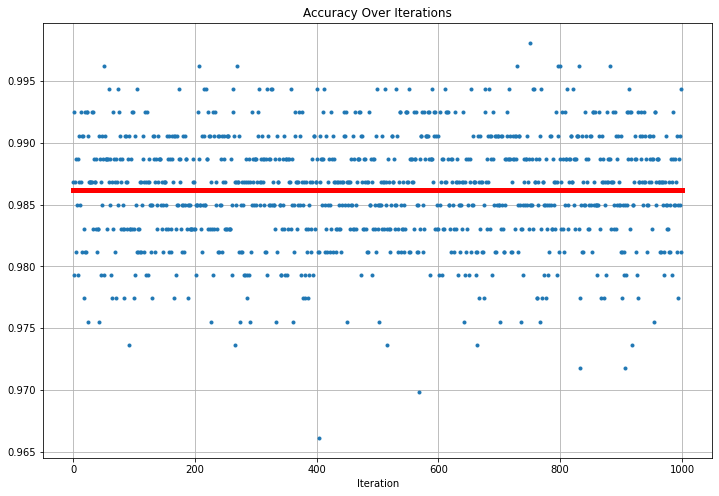

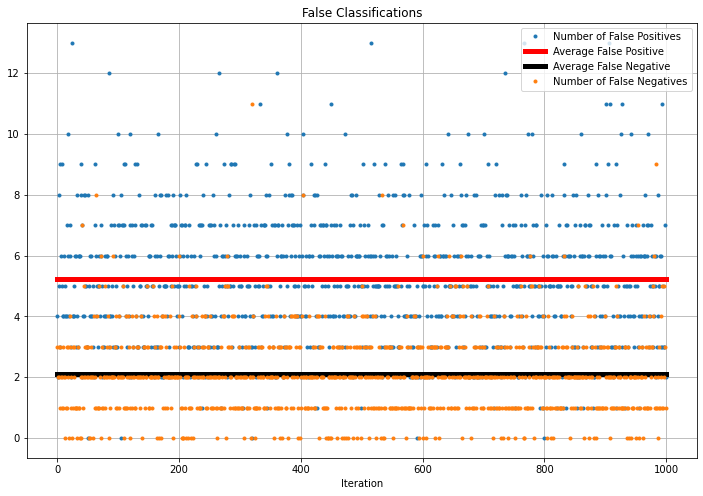

In [166]:
iters = np.arange(1000)

fp_avg = np.mean(fp_array)
fn_avg = np.mean(fn_array)
acc_avg = np.mean(acc_array)

plt.figure(figsize=(12,8))
plt.plot(iters, acc_array, marker='.', ls='')
plt.plot((0,1000), (acc_avg, acc_avg), label='Average Accuracy Score', color='red', lw=5)
plt.title('Accuracy Over Iterations')
plt.xlabel('Iteration')
plt.grid()
plt.show()

plt.figure(figsize=(12,8))
plt.plot(iters, fp_array, label='Number of False Positives', marker='.', ls='')
plt.plot((0,1000), (fp_avg, fp_avg), label='Average False Positive', color='red', lw=5)
plt.plot((0,1000), (fn_avg, fn_avg), label='Average False Negative', color='black', lw=5)
plt.plot(iters, fn_array, label='Number of False Negatives', marker='.', ls='')
plt.xlabel('Iteration')
plt.legend()
plt.title('False Classifications')
plt.grid()
plt.show()

Index of false positive identification: 30


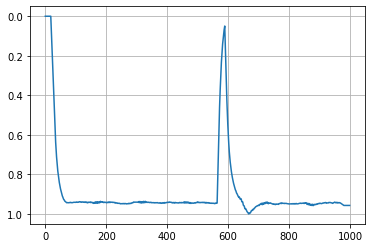

Index of false positive identification: 105


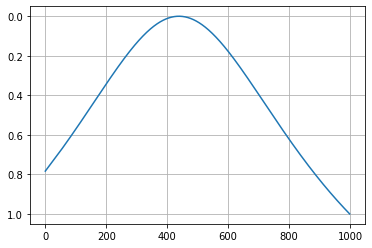

Index of false positive identification: 114


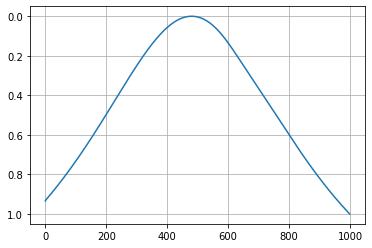

Index of false positive identification: 249


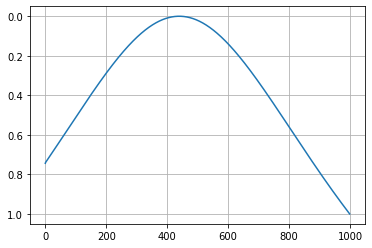

Index of false positive identification: 271


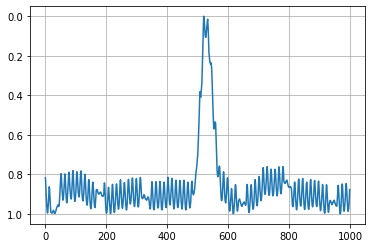

Index of false positive identification: 306


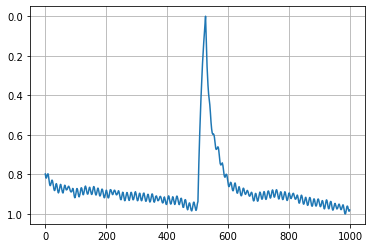

Index of false positive identification: 362


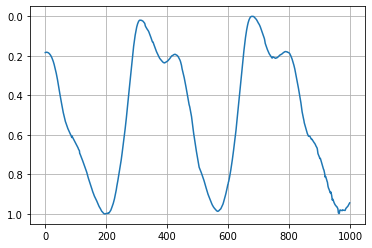

Index of false positive identification: 505


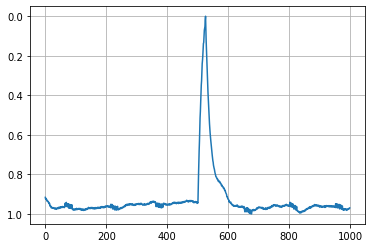

Index of false positive identification: 526


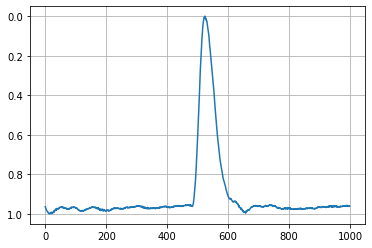

Total Number of False Positives: 9


In [134]:
fp_tot = 0

for i in range(len(y_test)):
    if y_test.iloc[i] != y_pred[i]:
        fp_tot += 1
        print("Index of false positive identification: " + str(i))
        plt.plot(X_test.iloc[i])
        plt.grid()
        plt.gca().invert_yaxis()
        plt.show()
print("Total Number of False Positives: " + str(fp_tot))

# Stochastic Gradient Descent

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(acc))

confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: " + str(tn) + "\n"
     "False Positives: " + str(fp) + "\n"
     "False Negatives: " + str(fn) + "\n"
     "True Positives: " + str(tp))

Accuracy: 0.8210922787193974
True Negatives: 161
False Positives: 50
False Negatives: 45
True Positives: 275


In [36]:
acc_array = np.zeros(1000)
fp_array = np.zeros(1000)
fn_array = np.zeros(1000)

i = 0
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
    clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
    clf.fit(X_train, y_train)
    Pipeline(steps=[('standardscaler', StandardScaler()),
                    ('sgdclassifier', SGDClassifier())])
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy for iteration %s: " % (i) + str(acc))
    confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    acc_array[i] = acc
    fp_array[i] = fp
    fn_array[i] = fn
    i += 1
    

fp_avg = np.mean(fp_array)
fn_avg = np.mean(fn_array)
acc_avg = np.mean(acc_array)
sgd_fails = [np.mean(fp_array), np.mean(fn_array), np.mean(acc_array)]

Accuracy for iteration 0: 0.8662900188323918
Accuracy for iteration 1: 0.864406779661017
Accuracy for iteration 2: 0.8436911487758946
Accuracy for iteration 3: 0.8342749529190208
Accuracy for iteration 4: 0.8267419962335216
Accuracy for iteration 5: 0.8625235404896422
Accuracy for iteration 6: 0.8286252354048964
Accuracy for iteration 7: 0.8568738229755178
Accuracy for iteration 8: 0.7909604519774012
Accuracy for iteration 9: 0.7532956685499058
Accuracy for iteration 10: 0.8286252354048964
Accuracy for iteration 11: 0.7532956685499058
Accuracy for iteration 12: 0.8813559322033898
Accuracy for iteration 13: 0.839924670433145
Accuracy for iteration 14: 0.8757062146892656
Accuracy for iteration 15: 0.8493408662900188
Accuracy for iteration 16: 0.8568738229755178
Accuracy for iteration 17: 0.7627118644067796
Accuracy for iteration 18: 0.8587570621468926
Accuracy for iteration 19: 0.847457627118644
Accuracy for iteration 20: 0.8286252354048964
Accuracy for iteration 21: 0.8662900188323918
A

Accuracy for iteration 181: 0.7476459510357816
Accuracy for iteration 182: 0.8097928436911488
Accuracy for iteration 183: 0.8625235404896422
Accuracy for iteration 184: 0.871939736346516
Accuracy for iteration 185: 0.7947269303201506
Accuracy for iteration 186: 0.832391713747646
Accuracy for iteration 187: 0.8662900188323918
Accuracy for iteration 188: 0.8210922787193974
Accuracy for iteration 189: 0.8662900188323918
Accuracy for iteration 190: 0.8512241054613936
Accuracy for iteration 191: 0.8305084745762712
Accuracy for iteration 192: 0.8851224105461394
Accuracy for iteration 193: 0.8342749529190208
Accuracy for iteration 194: 0.8531073446327684
Accuracy for iteration 195: 0.8418079096045198
Accuracy for iteration 196: 0.8361581920903954
Accuracy for iteration 197: 0.8267419962335216
Accuracy for iteration 198: 0.8662900188323918
Accuracy for iteration 199: 0.7928436911487758
Accuracy for iteration 200: 0.8662900188323918
Accuracy for iteration 201: 0.847457627118644
Accuracy for ite

Accuracy for iteration 361: 0.815442561205273
Accuracy for iteration 362: 0.8587570621468926
Accuracy for iteration 363: 0.8342749529190208
Accuracy for iteration 364: 0.8436911487758946
Accuracy for iteration 365: 0.8229755178907722
Accuracy for iteration 366: 0.8568738229755178
Accuracy for iteration 367: 0.8531073446327684
Accuracy for iteration 368: 0.8305084745762712
Accuracy for iteration 369: 0.8418079096045198
Accuracy for iteration 370: 0.8625235404896422
Accuracy for iteration 371: 0.8455743879472694
Accuracy for iteration 372: 0.8248587570621468
Accuracy for iteration 373: 0.8267419962335216
Accuracy for iteration 374: 0.8757062146892656
Accuracy for iteration 375: 0.8418079096045198
Accuracy for iteration 376: 0.7721280602636534
Accuracy for iteration 377: 0.8587570621468926
Accuracy for iteration 378: 0.8210922787193974
Accuracy for iteration 379: 0.8361581920903954
Accuracy for iteration 380: 0.8436911487758946
Accuracy for iteration 381: 0.6949152542372882
Accuracy for i

Accuracy for iteration 538: 0.768361581920904
Accuracy for iteration 539: 0.8286252354048964
Accuracy for iteration 540: 0.71939736346516
Accuracy for iteration 541: 0.8832391713747646
Accuracy for iteration 542: 0.8587570621468926
Accuracy for iteration 543: 0.8625235404896422
Accuracy for iteration 544: 0.8738229755178908
Accuracy for iteration 545: 0.8041431261770244
Accuracy for iteration 546: 0.8587570621468926
Accuracy for iteration 547: 0.7777777777777778
Accuracy for iteration 548: 0.8606403013182674
Accuracy for iteration 549: 0.8587570621468926
Accuracy for iteration 550: 0.8436911487758946
Accuracy for iteration 551: 0.8361581920903954
Accuracy for iteration 552: 0.8210922787193974
Accuracy for iteration 553: 0.8625235404896422
Accuracy for iteration 554: 0.8738229755178908
Accuracy for iteration 555: 0.8681732580037664
Accuracy for iteration 556: 0.8060263653483992
Accuracy for iteration 557: 0.8587570621468926
Accuracy for iteration 558: 0.8493408662900188
Accuracy for ite

Accuracy for iteration 714: 0.8549905838041432
Accuracy for iteration 715: 0.8493408662900188
Accuracy for iteration 716: 0.8587570621468926
Accuracy for iteration 717: 0.8531073446327684
Accuracy for iteration 718: 0.8286252354048964
Accuracy for iteration 719: 0.7570621468926554
Accuracy for iteration 720: 0.8662900188323918
Accuracy for iteration 721: 0.8512241054613936
Accuracy for iteration 722: 0.7796610169491526
Accuracy for iteration 723: 0.8738229755178908
Accuracy for iteration 724: 0.7645951035781544
Accuracy for iteration 725: 0.8455743879472694
Accuracy for iteration 726: 0.832391713747646
Accuracy for iteration 727: 0.8455743879472694
Accuracy for iteration 728: 0.8738229755178908
Accuracy for iteration 729: 0.8305084745762712
Accuracy for iteration 730: 0.8587570621468926
Accuracy for iteration 731: 0.8757062146892656
Accuracy for iteration 732: 0.8681732580037664
Accuracy for iteration 733: 0.7777777777777778
Accuracy for iteration 734: 0.8342749529190208
Accuracy for i

Accuracy for iteration 889: 0.8531073446327684
Accuracy for iteration 890: 0.8248587570621468
Accuracy for iteration 891: 0.8625235404896422
Accuracy for iteration 892: 0.8097928436911488
Accuracy for iteration 893: 0.783427495291902
Accuracy for iteration 894: 0.8587570621468926
Accuracy for iteration 895: 0.8097928436911488
Accuracy for iteration 896: 0.8267419962335216
Accuracy for iteration 897: 0.8512241054613936
Accuracy for iteration 898: 0.8531073446327684
Accuracy for iteration 899: 0.8116760828625236
Accuracy for iteration 900: 0.8248587570621468
Accuracy for iteration 901: 0.7815442561205274
Accuracy for iteration 902: 0.8361581920903954
Accuracy for iteration 903: 0.8436911487758946
Accuracy for iteration 904: 0.8587570621468926
Accuracy for iteration 905: 0.8493408662900188
Accuracy for iteration 906: 0.8606403013182674
Accuracy for iteration 907: 0.8436911487758946
Accuracy for iteration 908: 0.8418079096045198
Accuracy for iteration 909: 0.8229755178907722
Accuracy for i

# Decision Tree

In [37]:
from sklearn import tree

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(acc))

confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: " + str(tn) + "\n"
     "False Positives: " + str(fp) + "\n"
     "False Negatives: " + str(fn) + "\n"
     "True Positives: " + str(tp))

Accuracy: 0.9830508474576272
True Negatives: 219
False Positives: 5
False Negatives: 4
True Positives: 303


In [38]:
acc_array = np.zeros(1000)
fp_array = np.zeros(1000)
fn_array = np.zeros(1000)

i = 0
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy for iteration %s: " % (i) + str(acc))
    confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    acc_array[i] = acc
    fp_array[i] = fp
    fn_array[i] = fn
    i += 1
    

fp_avg = np.mean(fp_array)
fn_avg = np.mean(fn_array)
acc_avg = np.mean(acc_array)
dt_fails = [np.mean(fp_array), np.mean(fn_array), np.mean(acc_array)]

Accuracy for iteration 0: 0.9811676082862524
Accuracy for iteration 1: 0.9736346516007532
Accuracy for iteration 2: 0.967984934086629
Accuracy for iteration 3: 0.9717514124293786
Accuracy for iteration 4: 0.9849340866290018
Accuracy for iteration 5: 0.967984934086629
Accuracy for iteration 6: 0.9472693032015066
Accuracy for iteration 7: 0.992467043314501
Accuracy for iteration 8: 0.9548022598870056
Accuracy for iteration 9: 0.9774011299435028
Accuracy for iteration 10: 0.9510357815442562
Accuracy for iteration 11: 0.9774011299435028
Accuracy for iteration 12: 0.9529190207156308
Accuracy for iteration 13: 0.9830508474576272
Accuracy for iteration 14: 0.9717514124293786
Accuracy for iteration 15: 0.9774011299435028
Accuracy for iteration 16: 0.9774011299435028
Accuracy for iteration 17: 0.9830508474576272
Accuracy for iteration 18: 0.9774011299435028
Accuracy for iteration 19: 0.9736346516007532
Accuracy for iteration 20: 0.9566854990583804
Accuracy for iteration 21: 0.9472693032015066
A

Accuracy for iteration 178: 0.9698681732580038
Accuracy for iteration 179: 0.9736346516007532
Accuracy for iteration 180: 0.9642184557438794
Accuracy for iteration 181: 0.9887005649717514
Accuracy for iteration 182: 0.9698681732580038
Accuracy for iteration 183: 0.975517890772128
Accuracy for iteration 184: 0.9868173258003766
Accuracy for iteration 185: 0.9736346516007532
Accuracy for iteration 186: 0.9642184557438794
Accuracy for iteration 187: 0.9811676082862524
Accuracy for iteration 188: 0.9792843691148776
Accuracy for iteration 189: 0.9868173258003766
Accuracy for iteration 190: 0.9868173258003766
Accuracy for iteration 191: 0.9830508474576272
Accuracy for iteration 192: 0.9792843691148776
Accuracy for iteration 193: 0.967984934086629
Accuracy for iteration 194: 0.975517890772128
Accuracy for iteration 195: 0.975517890772128
Accuracy for iteration 196: 0.975517890772128
Accuracy for iteration 197: 0.975517890772128
Accuracy for iteration 198: 0.9887005649717514
Accuracy for iterat

Accuracy for iteration 354: 0.9642184557438794
Accuracy for iteration 355: 0.9717514124293786
Accuracy for iteration 356: 0.9811676082862524
Accuracy for iteration 357: 0.9887005649717514
Accuracy for iteration 358: 0.9774011299435028
Accuracy for iteration 359: 0.9472693032015066
Accuracy for iteration 360: 0.975517890772128
Accuracy for iteration 361: 0.9642184557438794
Accuracy for iteration 362: 0.9623352165725048
Accuracy for iteration 363: 0.9623352165725048
Accuracy for iteration 364: 0.9811676082862524
Accuracy for iteration 365: 0.9774011299435028
Accuracy for iteration 366: 0.9887005649717514
Accuracy for iteration 367: 0.9830508474576272
Accuracy for iteration 368: 0.9849340866290018
Accuracy for iteration 369: 0.9548022598870056
Accuracy for iteration 370: 0.967984934086629
Accuracy for iteration 371: 0.9566854990583804
Accuracy for iteration 372: 0.9642184557438794
Accuracy for iteration 373: 0.96045197740113
Accuracy for iteration 374: 0.9717514124293786
Accuracy for iter

Accuracy for iteration 530: 0.9830508474576272
Accuracy for iteration 531: 0.9811676082862524
Accuracy for iteration 532: 0.9830508474576272
Accuracy for iteration 533: 0.9811676082862524
Accuracy for iteration 534: 0.96045197740113
Accuracy for iteration 535: 0.9792843691148776
Accuracy for iteration 536: 0.9510357815442562
Accuracy for iteration 537: 0.9774011299435028
Accuracy for iteration 538: 0.9792843691148776
Accuracy for iteration 539: 0.9792843691148776
Accuracy for iteration 540: 0.9792843691148776
Accuracy for iteration 541: 0.9792843691148776
Accuracy for iteration 542: 0.9792843691148776
Accuracy for iteration 543: 0.9792843691148776
Accuracy for iteration 544: 0.9774011299435028
Accuracy for iteration 545: 0.9510357815442562
Accuracy for iteration 546: 0.9811676082862524
Accuracy for iteration 547: 0.9585687382297552
Accuracy for iteration 548: 0.967984934086629
Accuracy for iteration 549: 0.9792843691148776
Accuracy for iteration 550: 0.9453860640301318
Accuracy for ite

Accuracy for iteration 707: 0.9792843691148776
Accuracy for iteration 708: 0.9736346516007532
Accuracy for iteration 709: 0.9585687382297552
Accuracy for iteration 710: 0.9830508474576272
Accuracy for iteration 711: 0.9811676082862524
Accuracy for iteration 712: 0.9698681732580038
Accuracy for iteration 713: 0.9491525423728814
Accuracy for iteration 714: 0.9510357815442562
Accuracy for iteration 715: 0.9868173258003766
Accuracy for iteration 716: 0.9736346516007532
Accuracy for iteration 717: 0.9642184557438794
Accuracy for iteration 718: 0.975517890772128
Accuracy for iteration 719: 0.9792843691148776
Accuracy for iteration 720: 0.9548022598870056
Accuracy for iteration 721: 0.9717514124293786
Accuracy for iteration 722: 0.9717514124293786
Accuracy for iteration 723: 0.9868173258003766
Accuracy for iteration 724: 0.967984934086629
Accuracy for iteration 725: 0.9830508474576272
Accuracy for iteration 726: 0.9736346516007532
Accuracy for iteration 727: 0.967984934086629
Accuracy for ite

Accuracy for iteration 882: 0.9585687382297552
Accuracy for iteration 883: 0.9548022598870056
Accuracy for iteration 884: 0.9397363465160076
Accuracy for iteration 885: 0.9811676082862524
Accuracy for iteration 886: 0.9868173258003766
Accuracy for iteration 887: 0.9623352165725048
Accuracy for iteration 888: 0.9811676082862524
Accuracy for iteration 889: 0.9811676082862524
Accuracy for iteration 890: 0.967984934086629
Accuracy for iteration 891: 0.9529190207156308
Accuracy for iteration 892: 0.9566854990583804
Accuracy for iteration 893: 0.9736346516007532
Accuracy for iteration 894: 0.9905838041431262
Accuracy for iteration 895: 0.9661016949152542
Accuracy for iteration 896: 0.9623352165725048
Accuracy for iteration 897: 0.9736346516007532
Accuracy for iteration 898: 0.975517890772128
Accuracy for iteration 899: 0.9849340866290018
Accuracy for iteration 900: 0.9811676082862524
Accuracy for iteration 901: 0.9548022598870056
Accuracy for iteration 902: 0.9736346516007532
Accuracy for it

# Support Vector Machine (SVM)

In [39]:
from sklearn import svm

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(acc))

confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: " + str(tn) + "\n"
     "False Positives: " + str(fp) + "\n"
     "False Negatives: " + str(fn) + "\n"
     "True Positives: " + str(tp))

Accuracy: 0.9736346516007532
True Negatives: 217
False Positives: 13
False Negatives: 1
True Positives: 300


In [40]:
acc_array = np.zeros(1000)
fp_array = np.zeros(1000)
fn_array = np.zeros(1000)

i = 0
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy for iteration %s: " % (i) + str(acc))
    confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    acc_array[i] = acc
    fp_array[i] = fp
    fn_array[i] = fn
    i += 1
    

fp_avg = np.mean(fp_array)
fn_avg = np.mean(fn_array)
acc_avg = np.mean(acc_array)
svm_fails = [np.mean(fp_array), np.mean(fn_array), np.mean(acc_array)]

Accuracy for iteration 0: 0.992467043314501
Accuracy for iteration 1: 0.9849340866290018
Accuracy for iteration 2: 0.9811676082862524
Accuracy for iteration 3: 0.9774011299435028
Accuracy for iteration 4: 0.9774011299435028
Accuracy for iteration 5: 0.9774011299435028
Accuracy for iteration 6: 0.9830508474576272
Accuracy for iteration 7: 0.975517890772128
Accuracy for iteration 8: 0.9774011299435028
Accuracy for iteration 9: 0.9830508474576272
Accuracy for iteration 10: 0.9811676082862524
Accuracy for iteration 11: 0.975517890772128
Accuracy for iteration 12: 0.9811676082862524
Accuracy for iteration 13: 0.9887005649717514
Accuracy for iteration 14: 0.9830508474576272
Accuracy for iteration 15: 0.9774011299435028
Accuracy for iteration 16: 0.967984934086629
Accuracy for iteration 17: 0.9792843691148776
Accuracy for iteration 18: 0.9736346516007532
Accuracy for iteration 19: 0.9849340866290018
Accuracy for iteration 20: 0.9774011299435028
Accuracy for iteration 21: 0.9887005649717514
Ac

Accuracy for iteration 180: 0.9774011299435028
Accuracy for iteration 181: 0.9792843691148776
Accuracy for iteration 182: 0.9811676082862524
Accuracy for iteration 183: 0.9774011299435028
Accuracy for iteration 184: 0.9717514124293786
Accuracy for iteration 185: 0.9830508474576272
Accuracy for iteration 186: 0.9868173258003766
Accuracy for iteration 187: 0.9792843691148776
Accuracy for iteration 188: 0.9792843691148776
Accuracy for iteration 189: 0.9887005649717514
Accuracy for iteration 190: 0.9774011299435028
Accuracy for iteration 191: 0.9717514124293786
Accuracy for iteration 192: 0.9849340866290018
Accuracy for iteration 193: 0.9698681732580038
Accuracy for iteration 194: 0.9887005649717514
Accuracy for iteration 195: 0.9811676082862524
Accuracy for iteration 196: 0.9887005649717514
Accuracy for iteration 197: 0.9830508474576272
Accuracy for iteration 198: 0.9849340866290018
Accuracy for iteration 199: 0.9905838041431262
Accuracy for iteration 200: 0.9849340866290018
Accuracy for 

Accuracy for iteration 355: 0.9774011299435028
Accuracy for iteration 356: 0.9792843691148776
Accuracy for iteration 357: 0.9774011299435028
Accuracy for iteration 358: 0.9717514124293786
Accuracy for iteration 359: 0.9830508474576272
Accuracy for iteration 360: 0.9868173258003766
Accuracy for iteration 361: 0.9811676082862524
Accuracy for iteration 362: 0.9792843691148776
Accuracy for iteration 363: 0.9717514124293786
Accuracy for iteration 364: 0.9698681732580038
Accuracy for iteration 365: 0.9849340866290018
Accuracy for iteration 366: 0.975517890772128
Accuracy for iteration 367: 0.9698681732580038
Accuracy for iteration 368: 0.9792843691148776
Accuracy for iteration 369: 0.9623352165725048
Accuracy for iteration 370: 0.9868173258003766
Accuracy for iteration 371: 0.9868173258003766
Accuracy for iteration 372: 0.9717514124293786
Accuracy for iteration 373: 0.9849340866290018
Accuracy for iteration 374: 0.9736346516007532
Accuracy for iteration 375: 0.9830508474576272
Accuracy for i

Accuracy for iteration 530: 0.9849340866290018
Accuracy for iteration 531: 0.9736346516007532
Accuracy for iteration 532: 0.9849340866290018
Accuracy for iteration 533: 0.9623352165725048
Accuracy for iteration 534: 0.9774011299435028
Accuracy for iteration 535: 0.9830508474576272
Accuracy for iteration 536: 0.9792843691148776
Accuracy for iteration 537: 0.9774011299435028
Accuracy for iteration 538: 0.9849340866290018
Accuracy for iteration 539: 0.9830508474576272
Accuracy for iteration 540: 0.9774011299435028
Accuracy for iteration 541: 0.9698681732580038
Accuracy for iteration 542: 0.9698681732580038
Accuracy for iteration 543: 0.9774011299435028
Accuracy for iteration 544: 0.9811676082862524
Accuracy for iteration 545: 0.9849340866290018
Accuracy for iteration 546: 0.967984934086629
Accuracy for iteration 547: 0.9717514124293786
Accuracy for iteration 548: 0.9849340866290018
Accuracy for iteration 549: 0.975517890772128
Accuracy for iteration 550: 0.9736346516007532
Accuracy for it

Accuracy for iteration 708: 0.9830508474576272
Accuracy for iteration 709: 0.9811676082862524
Accuracy for iteration 710: 0.9830508474576272
Accuracy for iteration 711: 0.975517890772128
Accuracy for iteration 712: 0.9717514124293786
Accuracy for iteration 713: 0.9811676082862524
Accuracy for iteration 714: 0.9792843691148776
Accuracy for iteration 715: 0.9849340866290018
Accuracy for iteration 716: 0.9811676082862524
Accuracy for iteration 717: 0.9868173258003766
Accuracy for iteration 718: 0.9792843691148776
Accuracy for iteration 719: 0.9830508474576272
Accuracy for iteration 720: 0.9774011299435028
Accuracy for iteration 721: 0.975517890772128
Accuracy for iteration 722: 0.9717514124293786
Accuracy for iteration 723: 0.9736346516007532
Accuracy for iteration 724: 0.9792843691148776
Accuracy for iteration 725: 0.9849340866290018
Accuracy for iteration 726: 0.9887005649717514
Accuracy for iteration 727: 0.9792843691148776
Accuracy for iteration 728: 0.975517890772128
Accuracy for ite

Accuracy for iteration 885: 0.9736346516007532
Accuracy for iteration 886: 0.9849340866290018
Accuracy for iteration 887: 0.9774011299435028
Accuracy for iteration 888: 0.975517890772128
Accuracy for iteration 889: 0.9811676082862524
Accuracy for iteration 890: 0.9811676082862524
Accuracy for iteration 891: 0.9717514124293786
Accuracy for iteration 892: 0.9792843691148776
Accuracy for iteration 893: 0.9849340866290018
Accuracy for iteration 894: 0.9792843691148776
Accuracy for iteration 895: 0.9905838041431262
Accuracy for iteration 896: 0.9792843691148776
Accuracy for iteration 897: 0.975517890772128
Accuracy for iteration 898: 0.9868173258003766
Accuracy for iteration 899: 0.975517890772128
Accuracy for iteration 900: 0.992467043314501
Accuracy for iteration 901: 0.9698681732580038
Accuracy for iteration 902: 0.9717514124293786
Accuracy for iteration 903: 0.9717514124293786
Accuracy for iteration 904: 0.9830508474576272
Accuracy for iteration 905: 0.975517890772128
Accuracy for itera

# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(acc))

confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: " + str(tn) + "\n"
     "False Positives: " + str(fp) + "\n"
     "False Negatives: " + str(fn) + "\n"
     "True Positives: " + str(tp))

Accuracy: 0.8248587570621468
True Negatives: 197
False Positives: 25
False Negatives: 68
True Positives: 241


In [42]:
acc_array = np.zeros(1000)
fp_array = np.zeros(1000)
fn_array = np.zeros(1000)

i = 0
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, data['y'], train_size=0.5)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy for iteration %s: " % (i) + str(acc))
    confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    acc_array[i] = acc
    fp_array[i] = fp
    fn_array[i] = fn
    i += 1
    

fp_avg = np.mean(fp_array)
fn_avg = np.mean(fn_array)
acc_avg = np.mean(acc_array)
gnb_fails = [np.mean(fp_array), np.mean(fn_array), np.mean(acc_array)]

Accuracy for iteration 0: 0.8286252354048964
Accuracy for iteration 1: 0.8060263653483992
Accuracy for iteration 2: 0.815442561205273
Accuracy for iteration 3: 0.8060263653483992
Accuracy for iteration 4: 0.832391713747646
Accuracy for iteration 5: 0.8248587570621468
Accuracy for iteration 6: 0.8418079096045198
Accuracy for iteration 7: 0.8192090395480226
Accuracy for iteration 8: 0.8361581920903954
Accuracy for iteration 9: 0.8342749529190208
Accuracy for iteration 10: 0.8380414312617702
Accuracy for iteration 11: 0.8587570621468926
Accuracy for iteration 12: 0.815442561205273
Accuracy for iteration 13: 0.7777777777777778
Accuracy for iteration 14: 0.8060263653483992
Accuracy for iteration 15: 0.847457627118644
Accuracy for iteration 16: 0.8267419962335216
Accuracy for iteration 17: 0.8210922787193974
Accuracy for iteration 18: 0.8305084745762712
Accuracy for iteration 19: 0.8248587570621468
Accuracy for iteration 20: 0.8286252354048964
Accuracy for iteration 21: 0.8549905838041432
Ac

Accuracy for iteration 182: 0.8342749529190208
Accuracy for iteration 183: 0.832391713747646
Accuracy for iteration 184: 0.8267419962335216
Accuracy for iteration 185: 0.8135593220338984
Accuracy for iteration 186: 0.8455743879472694
Accuracy for iteration 187: 0.832391713747646
Accuracy for iteration 188: 0.8455743879472694
Accuracy for iteration 189: 0.8455743879472694
Accuracy for iteration 190: 0.8041431261770244
Accuracy for iteration 191: 0.8606403013182674
Accuracy for iteration 192: 0.8135593220338984
Accuracy for iteration 193: 0.8267419962335216
Accuracy for iteration 194: 0.8267419962335216
Accuracy for iteration 195: 0.8418079096045198
Accuracy for iteration 196: 0.8210922787193974
Accuracy for iteration 197: 0.832391713747646
Accuracy for iteration 198: 0.8248587570621468
Accuracy for iteration 199: 0.839924670433145
Accuracy for iteration 200: 0.8192090395480226
Accuracy for iteration 201: 0.8210922787193974
Accuracy for iteration 202: 0.8097928436911488
Accuracy for iter

Accuracy for iteration 361: 0.8229755178907722
Accuracy for iteration 362: 0.8418079096045198
Accuracy for iteration 363: 0.8060263653483992
Accuracy for iteration 364: 0.832391713747646
Accuracy for iteration 365: 0.839924670433145
Accuracy for iteration 366: 0.8380414312617702
Accuracy for iteration 367: 0.8380414312617702
Accuracy for iteration 368: 0.807909604519774
Accuracy for iteration 369: 0.8248587570621468
Accuracy for iteration 370: 0.8210922787193974
Accuracy for iteration 371: 0.8229755178907722
Accuracy for iteration 372: 0.839924670433145
Accuracy for iteration 373: 0.8531073446327684
Accuracy for iteration 374: 0.832391713747646
Accuracy for iteration 375: 0.8436911487758946
Accuracy for iteration 376: 0.815442561205273
Accuracy for iteration 377: 0.8342749529190208
Accuracy for iteration 378: 0.8041431261770244
Accuracy for iteration 379: 0.8418079096045198
Accuracy for iteration 380: 0.815442561205273
Accuracy for iteration 381: 0.8606403013182674
Accuracy for iterati

Accuracy for iteration 546: 0.8248587570621468
Accuracy for iteration 547: 0.8286252354048964
Accuracy for iteration 548: 0.807909604519774
Accuracy for iteration 549: 0.8436911487758946
Accuracy for iteration 550: 0.8587570621468926
Accuracy for iteration 551: 0.8135593220338984
Accuracy for iteration 552: 0.8116760828625236
Accuracy for iteration 553: 0.8361581920903954
Accuracy for iteration 554: 0.7966101694915254
Accuracy for iteration 555: 0.8361581920903954
Accuracy for iteration 556: 0.847457627118644
Accuracy for iteration 557: 0.8229755178907722
Accuracy for iteration 558: 0.8380414312617702
Accuracy for iteration 559: 0.839924670433145
Accuracy for iteration 560: 0.8286252354048964
Accuracy for iteration 561: 0.8286252354048964
Accuracy for iteration 562: 0.7984934086629002
Accuracy for iteration 563: 0.8361581920903954
Accuracy for iteration 564: 0.8229755178907722
Accuracy for iteration 565: 0.8625235404896422
Accuracy for iteration 566: 0.8342749529190208
Accuracy for ite

Accuracy for iteration 726: 0.8173258003766478
Accuracy for iteration 727: 0.8342749529190208
Accuracy for iteration 728: 0.8210922787193974
Accuracy for iteration 729: 0.8267419962335216
Accuracy for iteration 730: 0.847457627118644
Accuracy for iteration 731: 0.8060263653483992
Accuracy for iteration 732: 0.8493408662900188
Accuracy for iteration 733: 0.832391713747646
Accuracy for iteration 734: 0.8418079096045198
Accuracy for iteration 735: 0.839924670433145
Accuracy for iteration 736: 0.8248587570621468
Accuracy for iteration 737: 0.8248587570621468
Accuracy for iteration 738: 0.8267419962335216
Accuracy for iteration 739: 0.832391713747646
Accuracy for iteration 740: 0.8210922787193974
Accuracy for iteration 741: 0.847457627118644
Accuracy for iteration 742: 0.8455743879472694
Accuracy for iteration 743: 0.8342749529190208
Accuracy for iteration 744: 0.8248587570621468
Accuracy for iteration 745: 0.8097928436911488
Accuracy for iteration 746: 0.8361581920903954
Accuracy for itera

Accuracy for iteration 906: 0.832391713747646
Accuracy for iteration 907: 0.8210922787193974
Accuracy for iteration 908: 0.7909604519774012
Accuracy for iteration 909: 0.8361581920903954
Accuracy for iteration 910: 0.8210922787193974
Accuracy for iteration 911: 0.8229755178907722
Accuracy for iteration 912: 0.807909604519774
Accuracy for iteration 913: 0.8531073446327684
Accuracy for iteration 914: 0.7984934086629002
Accuracy for iteration 915: 0.8493408662900188
Accuracy for iteration 916: 0.8022598870056498
Accuracy for iteration 917: 0.8192090395480226
Accuracy for iteration 918: 0.8097928436911488
Accuracy for iteration 919: 0.8267419962335216
Accuracy for iteration 920: 0.8568738229755178
Accuracy for iteration 921: 0.8135593220338984
Accuracy for iteration 922: 0.8267419962335216
Accuracy for iteration 923: 0.832391713747646
Accuracy for iteration 924: 0.8116760828625236
Accuracy for iteration 925: 0.8173258003766478
Accuracy for iteration 926: 0.8418079096045198
Accuracy for ite

# Bar Plot

In [44]:
print(rf_fails)
print(sgd_fails)
print(gnb_fails)
print(dt_fails)
print(svm_fails)

[5.263, 2.056, 0.9862165725047081]
[58.868, 27.682, 0.8370056497175141]
[24.512, 67.538, 0.8266478342749528]
[10.634, 4.226, 0.9720150659133711]
[10.152, 0.566, 0.9798154425612051]


In [ ]:
# fails=[false_pos, false_neg, acc]

labels = ['Random Forest', 'SGD', 'Gaussian NB', 'Decision Tree', 'SVM']
false_pos = [rf_fails[0], sgd_fails[0], gnb_fails[0], dt_fails[0], svm_fails[0]]
false_neg = [rf_fails[1], sgd_fails[1], gnb_fails[1], dt_fails[1], svm_fails[1]]
acc = [rf_fails[2], sgd_fails[2], gnb_fails[2], dt_fails[2], svm_fails[2]]

false_pos_change = [0, 1, 2, 3, 4]
false_neg_change = [3, 4, 5, 6, 7]
acc_change = [6, 7, 8, 9, 10]

false_pos = np.round_(false_pos, decimals=2)
false_neg = np.round_(false_neg, decimals=2)
acc = np.round_(acc, decimals=2)

data = [false_pos, false_neg, acc]
data = np.asarray(data, dtype=str)

data_change = [false_pos_change, false_neg_change, acc_change]
data_change = np.asarray(data_change, dtype=str)

data_with_change = []



In [58]:
# fails=[false_pos, false_neg, acc]

labels = ['Random Forest', 'SGD', 'Gaussian NB', 'Decision Tree', 'SVM']
false_pos = [rf_fails[0], sgd_fails[0], gnb_fails[0], dt_fails[0], svm_fails[0]]
false_neg = [rf_fails[1], sgd_fails[1], gnb_fails[1], dt_fails[1], svm_fails[1]]
acc = [rf_fails[2], sgd_fails[2], gnb_fails[2], dt_fails[2], svm_fails[2]]

false_pos_change = [0, 1, 2]
false_neg_change = [3, 4, 5]
acc_change = [6, 7, 8]

false_pos = np.round_(false_pos, decimals=2)
false_neg = np.round_(false_neg, decimals=2)
acc = np.round_(acc, decimals=2)

data = [false_pos, false_neg, acc]
data = np.asarray(data, dtype=str)

data_change = [false_pos_change, false_neg_change, acc_change]
data_change = np.asarray(data_change, dtype=str)

data_with_change = data + str('+') + data_change
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#ax2 = ax.twinx()
ax.zorder = 1
#ax2.zorder = 2

rects1 = ax.bar(x - width/2, false_pos, width, label='False Positive', color='orange')
rects2 = ax.bar(x + width/2, false_neg, width, label='False Negative', color='black')
#rects3 = ax2.bar(x, acc, width*2, label='Accuracy', alpha = 0.1, color='green')
the_table = plt.table(cellText=data,
          rowLabels=[' False Positives ', ' False Negatives ', ' Accuracy '],
          colLabels=labels,
          cellLoc='center',
          loc='bottom',
          fontsize=20)
the_table.auto_set_font_size(False)
the_table.set_fontsize(8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average')
ax.set_ylim(0, 80)
ax.set_title('Classifier Comparison for 1,000 Iterations')
ax.set_xticks([])
#ax.set_xticklabels(labels, rotation=45)
ax.legend(loc='upper center', markerscale=0.02, markerfirst=False, fontsize='small')

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#ax2.bar_label(rects3, padding=3)

color = 'tab:blue'
#ax2.set_ylabel('Accuracy', color='green')  # we already handled the x-label with ax1
#ax2.bar(x - width/2, acc, color=color)
#ax2.tick_params(axis='y', labelcolor='green')


fig.tight_layout(rect=(0,0,1,1.6))

plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U8'), dtype('<U8')) -> dtype('<U8')